In [1]:
import pandas as pd
import numpy as npp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('./datasets/housing.csv')
df.describe()
df = df.rename(columns={'housing_median_age':'age'})
df.head()

,longitude,latitude,age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<module 'matplotlib.pyplot' from 'C:\\Users\\kxpat\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\matplotlib\\pyplot.py'>

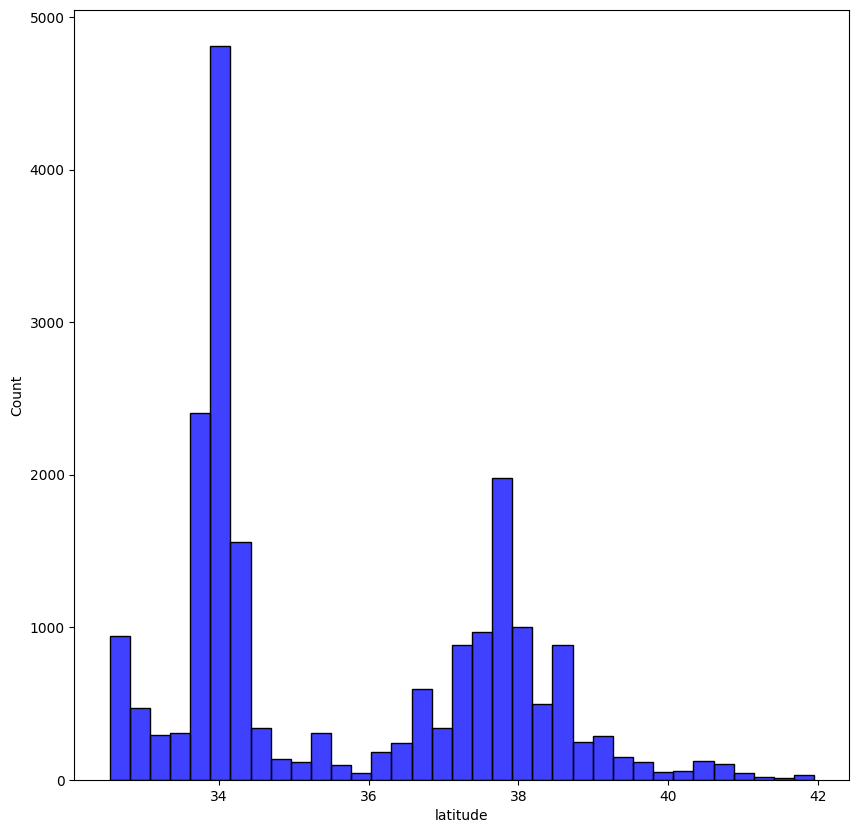

In [3]:
#EDA
plt.figure(figsize=(10,10))
sns.histplot(df['latitude'], kde=False, color='b')
plt

In [4]:
X_train, X_test, y_train, y_test= train_test_split(df[['population']], df.households, test_size=0.2)
X_train
X_test

,population
20062,1343.0
7444,2609.0
9092,766.0
15009,1345.0
19165,1767.0
...,...
19802,18.0
10424,1571.0
14194,3727.0
3454,3473.0


In [5]:
reg = linear_model.LinearRegression()
reg.fit(df[['population']], df.households)
reg.predict([[3000]])

C:\Users\kxpat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([981.79518259])

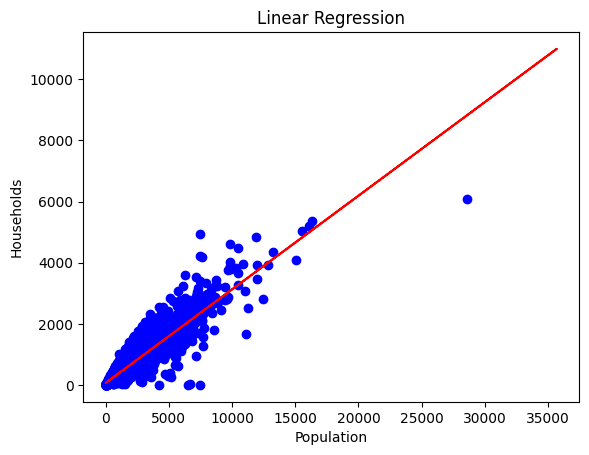

In [6]:
# Plot the training data
plt.scatter(X_train, y_train, color='blue')

# Plot the regression line
reg_line = reg.coef_*df[['population']] + reg.intercept_
plt.plot(df[['population']], reg_line, color='red')

plt.xlabel('Population')
plt.ylabel('Households')
plt.title('Linear Regression')
plt.show()